In [20]:
pip install squarify --user
pip install mlxtend --user

Note: you may need to restart the kernel to use updated packages.


In [13]:
import squarify

In [3]:
import pandas as pd
import numpy as np

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
# import squarify
import matplotlib

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
data = pd.read_csv('MBA.csv',header=None)

In [7]:
data.shape


(7501, 20)

In [8]:
trans=[]
for i in range(0,7501):
    trans.append([str(data.values[i,j]) for j in range(0,20)])

trans=np.array(trans)
print(trans)

print(trans.shape)

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['chicken' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['escalope' 'green tea' 'nan' ... 'nan' 'nan' 'nan']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... 'nan' 'nan' 'nan']]
(7501, 20)


In [9]:
t=TransactionEncoder()
data=t.fit_transform(trans)
print(data)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

[[False  True  True ...  True False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False  True False]]


(7501, 121)

In [10]:
data.drop('nan',axis=1,inplace=True)

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes'),
 Text(0, 0, 'burgers'),
 Text(0, 0, 'cake'),
 Text(0, 0, 'cookies'),
 Text(0, 0, 'escalope'),
 Text(0, 0, 'low fat yogurt'),
 Text(0, 0, 'shrimp'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'frozen smoothie'),
 Text(0, 0, 'turkey')]

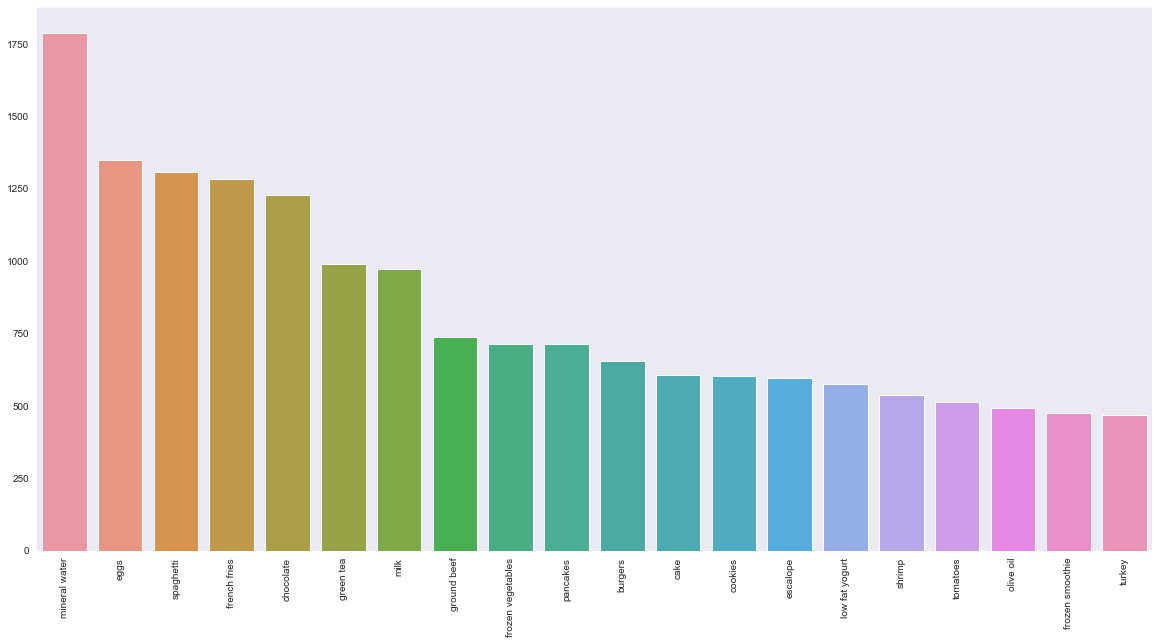

In [11]:
r=data.sum(axis=0).sort_values(ascending=False)[:20]
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

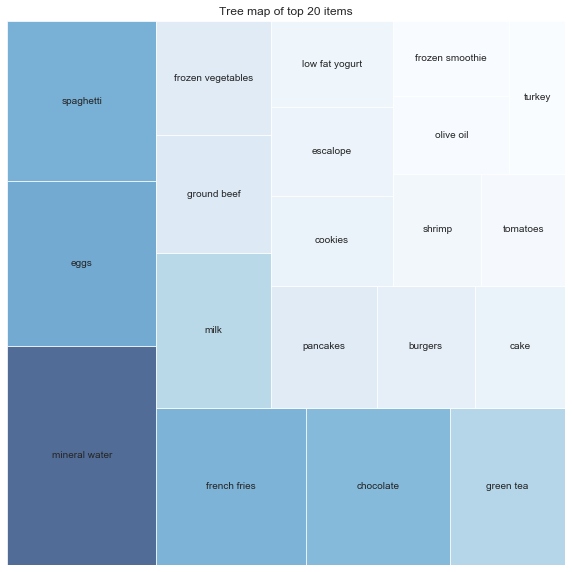

In [14]:
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

In [15]:
freq_items=apriori(data,min_support=0.05,use_colnames=True)

In [16]:
freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [17]:
res=association_rules(freq_items,metric="lift",min_threshold=1.3)

In [18]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In [19]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [20]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
25,0.052660,"(chocolate, mineral water)",2
26,0.050927,"(eggs, mineral water)",2
27,0.059725,"(spaghetti, mineral water)",2


In [21]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [22]:
from mlxtend.frequent_patterns import fpgrowth

In [23]:
res=fpgrowth(data,min_support=0.05,use_colnames=True)
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [24]:
#Applying association rules
res=association_rules(res,metric="lift",min_threshold=1)

In [25]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


In [26]:
#Time taken by each algorithm
#Apriori
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
5,0.033729,(brownies)
6,0.087188,(burgers)
7,0.030129,(butter)
8,0.081056,(cake)
9,0.015331,(carrots)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
5,0.081056,(cake)
6,0.025730,(cereals)
7,0.046794,(champagne)
8,0.059992,(chicken)
9,0.163845,(chocolate)


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)
